In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = "./data/seguridad"
DATA_PROCESSED_PATH = "./data/processed"
RES_PATH = "./res/"

VISUALS = "./visuals"
if not os.path.exists(VISUALS):
    os.mkdir(os.path.join(VISUALS, "seguridad"))
    VISUALS = os.path.join(VISUALS, "seguridad")

os.listdir(DATA_PROCESSED_PATH)

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_143880/1983701076.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/la

['mapa-violencia-de-genero-2021.csv',
 'comisarias.csv',
 'delitos-2021.csv',
 'backup-2021-suac-data.csv']

# Radios Censales
Usaoms como input para sumarle granularidad a la extracción de indicadores en Seguridad.

In [2]:
radios_censales = gpd.read_file(os.path.join(RES_PATH, "radios-censales-geojson.json"), driver="GeoJSON")
print(radios_censales.info())
radios_censales.head(5)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3554 entries, 0 to 3553
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   WKT         3554 non-null   object  
 1   ID          3554 non-null   object  
 2   CO_FRAC_RA  3554 non-null   object  
 3   COMUNA      3554 non-null   object  
 4   FRACCION    3554 non-null   object  
 5   RADIO       3554 non-null   object  
 6   TOTAL_POB   3554 non-null   object  
 7   T_VARON     3554 non-null   object  
 8   T_MUJER     3554 non-null   object  
 9   T_VIVIENDA  3554 non-null   object  
 10  V_PARTICUL  3554 non-null   object  
 11  V_COLECTIV  3554 non-null   object  
 12  T_HOGAR     3554 non-null   object  
 13  H_CON_NBI   3554 non-null   object  
 14  H_SIN_NBI   3554 non-null   object  
 15  geometry    3554 non-null   geometry
dtypes: geometry(1), object(15)
memory usage: 444.4+ KB
None


,WKT,ID,CO_FRAC_RA,COMUNA,FRACCION,RADIO,TOTAL_POB,T_VARON,T_MUJER,T_VIVIENDA,V_PARTICUL,V_COLECTIV,T_HOGAR,H_CON_NBI,H_SIN_NBI,geometry
0,MULTIPOLYGON (((-58.372489764082 -34.591546570...,1,1_1_1,1,1,1,336,212,124,82,80,2,65,19,46,"MULTIPOLYGON (((-58.37249 -34.59155, -58.37261..."
1,MULTIPOLYGON (((-58.3865223305709 -34.60399309...,2,1_12_1,1,12,1,341,184,157,365,361,4,116,25,91,"MULTIPOLYGON (((-58.38652 -34.60399, -58.38634..."
2,MULTIPOLYGON (((-58.3793832787935 -34.60483817...,3,1_12_10,1,12,10,296,162,134,629,627,2,101,1,100,"MULTIPOLYGON (((-58.37938 -34.60484, -58.37801..."
3,MULTIPOLYGON (((-58.3679211414675 -34.60517426...,4,1_12_11,1,12,11,528,294,234,375,370,5,136,7,129,"MULTIPOLYGON (((-58.36792 -34.60517, -58.36772..."
4,MULTIPOLYGON (((-58.3851326494337 -34.60391158...,5,1_12_2,1,12,2,229,101,128,445,445,0,129,16,113,"MULTIPOLYGON (((-58.38513 -34.60391, -58.38371..."


<Axes: >

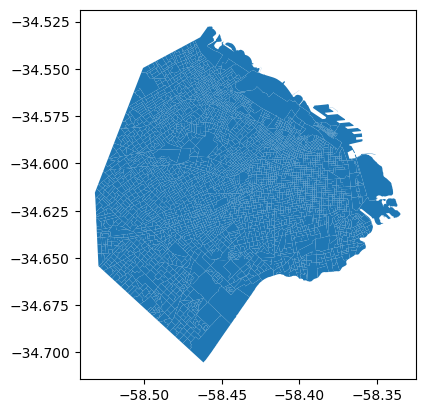

In [3]:
radios_censales.plot()

In [4]:
radios_censales.set_crs(epsg=4326, inplace=True)

,WKT,ID,CO_FRAC_RA,COMUNA,FRACCION,RADIO,TOTAL_POB,T_VARON,T_MUJER,T_VIVIENDA,V_PARTICUL,V_COLECTIV,T_HOGAR,H_CON_NBI,H_SIN_NBI,geometry
0,MULTIPOLYGON (((-58.372489764082 -34.591546570...,1,1_1_1,1,1,1,336,212,124,82,80,2,65,19,46,"MULTIPOLYGON (((-58.37249 -34.59155, -58.37261..."
1,MULTIPOLYGON (((-58.3865223305709 -34.60399309...,2,1_12_1,1,12,1,341,184,157,365,361,4,116,25,91,"MULTIPOLYGON (((-58.38652 -34.60399, -58.38634..."
2,MULTIPOLYGON (((-58.3793832787935 -34.60483817...,3,1_12_10,1,12,10,296,162,134,629,627,2,101,1,100,"MULTIPOLYGON (((-58.37938 -34.60484, -58.37801..."
3,MULTIPOLYGON (((-58.3679211414675 -34.60517426...,4,1_12_11,1,12,11,528,294,234,375,370,5,136,7,129,"MULTIPOLYGON (((-58.36792 -34.60517, -58.36772..."
4,MULTIPOLYGON (((-58.3851326494337 -34.60391158...,5,1_12_2,1,12,2,229,101,128,445,445,0,129,16,113,"MULTIPOLYGON (((-58.38513 -34.60391, -58.38371..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,MULTIPOLYGON (((-58.3821175493669 -34.58429918...,3550,1_3_12,1,3,12,561,269,292,170,170,0,181,70,111,"MULTIPOLYGON (((-58.38212 -34.58430, -58.38125..."
3550,MULTIPOLYGON (((-58.3811903214861 -34.58482573...,3551,1_3_11,1,3,11,745,377,368,223,223,0,267,95,172,"MULTIPOLYGON (((-58.38119 -34.58483, -58.38002..."
3551,MULTIPOLYGON (((-58.3808613781611 -34.58431132...,3552,1_3_10,1,3,10,745,367,378,261,261,0,261,86,175,"MULTIPOLYGON (((-58.38086 -34.58431, -58.38047..."
3552,MULTIPOLYGON (((-58.4353204006853 -34.64905180...,3553,7_18_11,7,18,11,1325,685,640,223,223,0,403,143,260,"MULTIPOLYGON (((-58.43532 -34.64905, -58.43496..."


In [5]:
radios_censales.CO_FRAC_RA.duplicated().any()

False

# Map Delitos

In [6]:
delitos = pd.read_csv(os.path.join(DATA_PROCESSED_PATH, "delitos-2021.csv"))
delitos.sample()

# drop unused
delitos.drop(columns=["latitud", "longitud"], inplace=True)

# convert to GeoDataframe
delitos["geometry"] = gpd.GeoSeries.from_wkt(delitos["geometry"])
delitos = gpd.GeoDataFrame(delitos, geometry="geometry")
delitos.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 87390 entries, 0 to 87389
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id-mapa   87390 non-null  object  
 1   fecha     87390 non-null  object  
 2   franja    85901 non-null  float64 
 3   tipo      87390 non-null  object  
 4   barrio    87390 non-null  object  
 5   comuna    87390 non-null  float64 
 6   geometry  87390 non-null  geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 4.7+ MB


In [7]:
delitos.set_crs(epsg=4326, inplace=True)

,id-mapa,fecha,franja,tipo,barrio,comuna,geometry
0,HC-2021-1008202,2021-01-06,18.0,Homicidio,Constitución,1.0,POINT (-58.37915 -34.62761)
1,HC-2021-1009094,2021-01-07,10.0,Homicidio,Mataderos,9.0,POINT (-58.51059 -34.64973)
2,HC-2021-1013236,2021-01-10,7.0,Homicidio,Parque Chacabuco,7.0,POINT (-58.43058 -34.62917)
3,HC-2021-1014154,2021-01-11,9.0,Homicidio,Nueva Pompeya,5.0,POINT (-58.41456 -34.63868)
4,HC-2021-1015476,2021-01-11,21.0,Homicidio,Parque Avellaneda,9.0,POINT (-58.46807 -34.64771)
...,...,...,...,...,...,...,...
87385,RH-2021-3751758,2021-05-08,10.0,Hurto (sin violencia),Balvanera,3.0,POINT (-58.39538 -34.60575)
87386,RH-2021-3768141,2021-06-29,21.0,Robo (con violencia),Palermo,14.0,POINT (-58.42234 -34.59266)
87387,RH-2021-3768589,2021-06-30,13.0,Robo (con violencia),Balvanera,3.0,POINT (-58.40462 -34.60879)
87388,RH-2021-3783716,2021-07-31,1.0,Hurto (sin violencia),Balvanera,3.0,POINT (-58.39453 -34.60328)


In [8]:
radios_censales_mapped_delitos = gpd.sjoin(radios_censales[["geometry", "CO_FRAC_RA"]], delitos, how="right", op="intersects")
print("\nINFO on MERGED DATA: \n")
radios_censales_mapped_delitos.info()
radios_censales_mapped_delitos.sample()

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):



INFO on MERGED DATA: 

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 87391 entries, 0 to 87389
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   index_left  87375 non-null  float64 
 1   CO_FRAC_RA  87375 non-null  object  
 2   id-mapa     87391 non-null  object  
 3   fecha       87391 non-null  object  
 4   franja      85902 non-null  float64 
 5   tipo        87391 non-null  object  
 6   barrio      87391 non-null  object  
 7   comuna      87391 non-null  float64 
 8   geometry    87391 non-null  geometry
dtypes: float64(3), geometry(1), object(5)
memory usage: 6.7+ MB


,index_left,CO_FRAC_RA,id-mapa,fecha,franja,tipo,barrio,comuna,geometry
20126,619.0,11_22_6,RH-2021-1111212,2021-03-11,14.0,Hurto (sin violencia),Villa Gral. Mitre,11.0,POINT (-58.46796 -34.61727)


<Axes: >

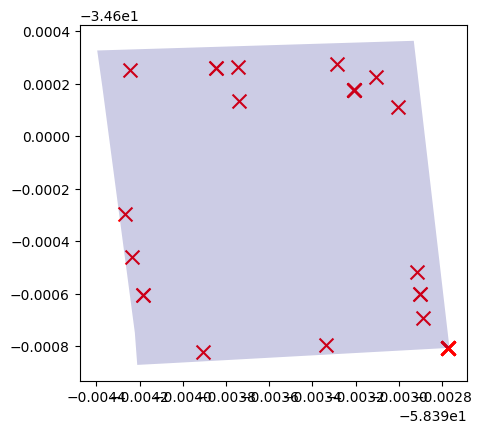

In [9]:
# Testeamos el merge ploteando una serie de delitos reportados y viendo si coinciden con el polígono del radio censal
sample_radio = radios_censales.CO_FRAC_RA.sample().values[0]

sample_data = radios_censales_mapped_delitos[radios_censales_mapped_delitos.CO_FRAC_RA == sample_radio]

fig, ax = plt.subplots(1,1, figsize=(5,5))

sample_data.plot(marker="x", color="red", markersize=100, ax=ax)
radios_censales[radios_censales.CO_FRAC_RA == sample_radio].plot(ax=ax, color="navy", alpha=0.2)

## Build metrics

### Nivel de Criminalidad

**El radio censal presenta alta criminalidad?**

Para verificarlo, calculamos el quintil de la cantidad de delitos, totales y por tipo y asignamos un score.

In [10]:
agged_rc_delitos_por_tipo = radios_censales_mapped_delitos.groupby(["CO_FRAC_RA", "tipo"])\
    .geometry.count()\
    .reset_index().rename(columns={"geometry": "cantidad_delitos"})

agged_rc_delitos_por_tipo.sample(5)

,CO_FRAC_RA,tipo,cantidad_delitos
6958,5_18_1,Hurto (sin violencia),12
8990,8_9_8,Hurto (sin violencia),10
8813,8_3_7,Robo (con violencia),9
2418,13_4_10,Robo (con violencia),7
2321,13_28_5,Robo (con violencia),7


In [48]:
## merge with radios censales geometries
agged_rc_delitos_por_tipo = agged_rc_delitos_por_tipo.merge(radios_censales[["CO_FRAC_RA", "geometry"]], on="CO_FRAC_RA", how="left")

In [52]:
agged_rc_delitos_por_tipo = gpd.GeoDataFrame(agged_rc_delitos_por_tipo, geometry="geometry")

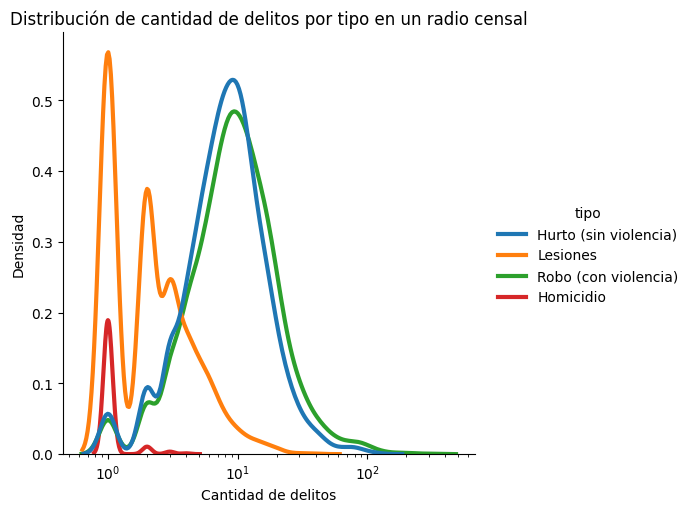

In [11]:
# Distribucion de cantidad de delitos en un radio censal por tipo
p = sns.displot(data=agged_rc_delitos_por_tipo,
            x="cantidad_delitos",
            hue="tipo",
            kind="kde",
            log_scale=True,
            linewidth=3)

p.set(xlabel="Cantidad de delitos", ylabel="Densidad", title="Distribución de cantidad de delitos por tipo en un radio censal")

# Se evidencia bimodalidad en la distribucion de lesiones, con lo cual vamos a ver si se pueden encontrar dos clusters para luego asignar scores

#### Sub analisis: distribucion de lesiones por RC

In [12]:
lesiones = agged_rc_delitos_por_tipo[agged_rc_delitos_por_tipo.tipo.str.lower() == "lesiones"].copy()
lesiones.sample()

,CO_FRAC_RA,tipo,cantidad_delitos
5628,3_20_1,Lesiones,5


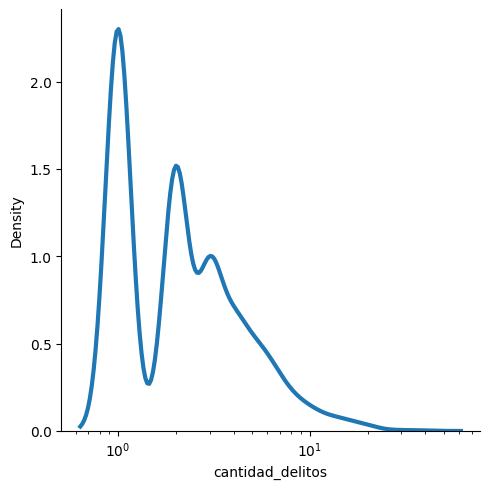

In [13]:
sns.displot(data=lesiones, log_scale=True, x="cantidad_delitos", kind="kde", linewidth=3)

<Axes: xlabel='franja'>

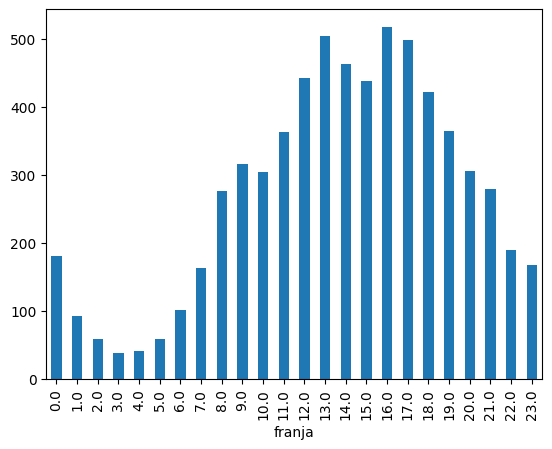

In [14]:
# Esta relacionado con la franja horaria?

lesiones_por_franja = radios_censales_mapped_delitos[radios_censales_mapped_delitos.tipo.str.lower() == "lesiones"]\
    .groupby(["CO_FRAC_RA", "franja"])\
    .geometry.count()\
    .reset_index().rename(columns={"geometry": "cantidad_delitos"})

lesiones_por_franja.groupby("franja").cantidad_delitos.sum().plot(kind="bar")


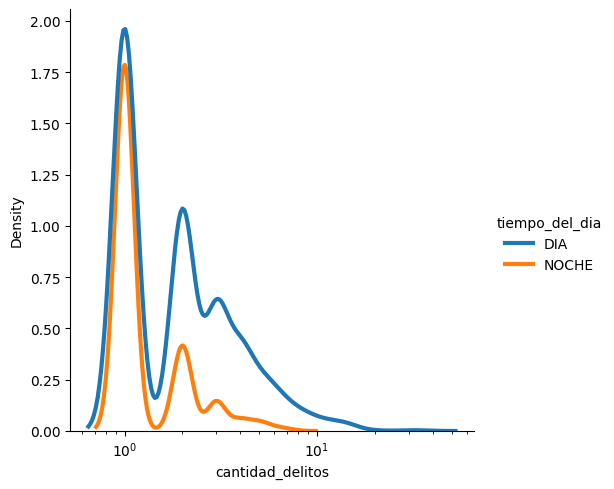

In [15]:
# Agregamos campo de horario para confirmar si la bimodalidad se divide entre delitos durante el dia y la noche
lesiones_por_franja["tiempo_del_dia"] = lesiones_por_franja.franja.apply(lambda franja : "DIA" if franja >= 8 and franja < 21 else "NOCHE")

aux = lesiones_por_franja.groupby(["CO_FRAC_RA", "tiempo_del_dia"])\
    .cantidad_delitos.sum()\
    .reset_index()

sns.displot(data=aux, x="cantidad_delitos", hue="tiempo_del_dia", kind="kde", log_scale=True, linewidth=3)

## Sigue existiendo bimodalidad

In [16]:
lesiones["comuna"] = lesiones.CO_FRAC_RA.apply(lambda x : int(x.split("_")[0]))
lesiones["fraccion"] = lesiones.CO_FRAC_RA.apply(lambda x : int(x.split("_")[1]))


In [17]:
# Como la bimodalidad se da a nivel radio censal, puede deberse a que en algunas comunas este tipo de delito está altamente concentrado en algunos radios, mientras que en otras comunas está distribuido 
# de forma más homogénea

aux = lesiones.merge(radios_censales[["CO_FRAC_RA", "geometry"]], on="CO_FRAC_RA")
aux = gpd.GeoDataFrame(aux, geometry="geometry")
# aux.plot(column="cantidad_delitos")

<Axes: >

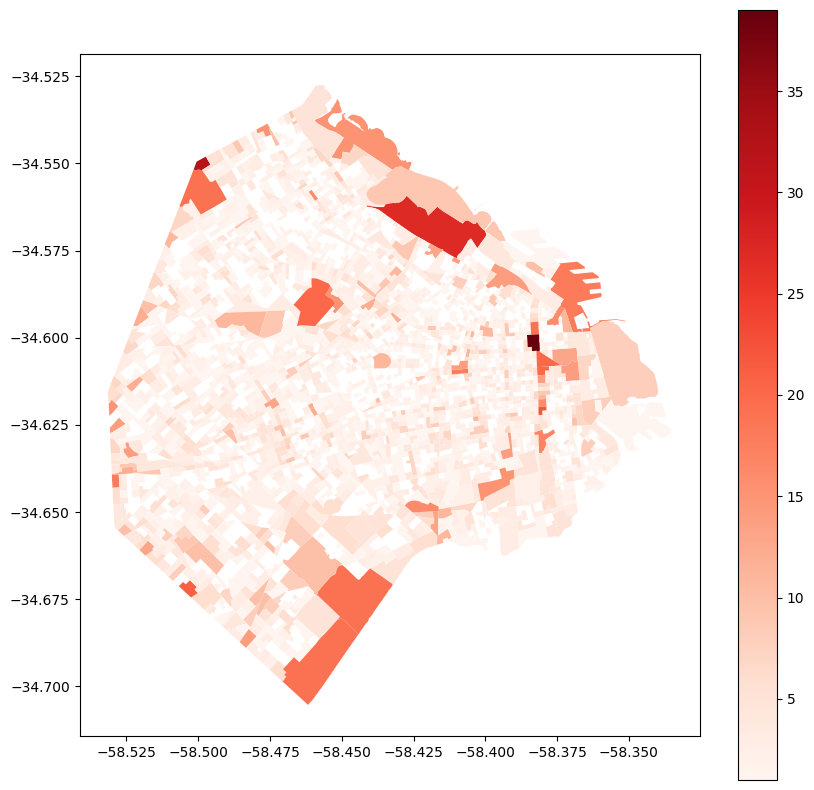

In [35]:
aux.plot(column="cantidad_delitos", legend=True, figsize=(10,10), cmap="Reds")
# Los delitos asociados a lesiones se concentran en un subconjunto finito d radios censales

In [37]:
lesiones.cantidad_delitos.describe(percentiles=[.5,.6,.7,.8,.9,.95,.99])

count    2349.000000
mean        2.805023
std         2.820035
min         1.000000
50%         2.000000
60%         2.000000
70%         3.000000
80%         4.000000
90%         6.000000
95%         8.000000
99%        15.000000
max        39.000000
Name: cantidad_delitos, dtype: float64

In [173]:
# Split de radios censales según si son de alta o baja concentración de delitos por lesiones

def assign_concentration(x, distribution=lesiones.cantidad_delitos):
    """
    Assign concentracion label depending on the percentile of delitos por lesiones
     - > 95%: alta
     - > 50%: normal
     - <= 50%: baja
    """
    if x > distribution.quantile(.95):
        return "alta"
    elif x > distribution.quantile(.5):
        return "moderada"
    else:
        return "baja"


lesiones["concentracion"] = lesiones.cantidad_delitos.apply(assign_concentration)

In [194]:
lesiones[lesiones.concentracion == "baja"].cantidad_delitos.value_counts(normalize=True, dropna=False)

1    0.606535
2    0.393465
Name: cantidad_delitos, dtype: float64

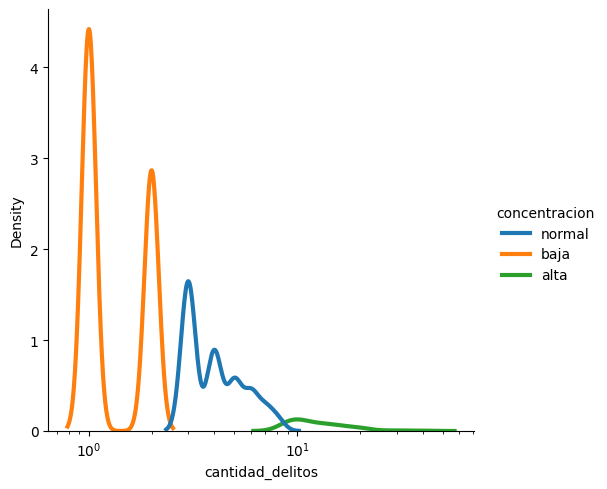

In [77]:
sns.displot(data=lesiones, x="cantidad_delitos", hue="concentracion", kind="kde", log_scale=True, linewidth=3)

#### Sub-analisis : Homicidios

<Axes: >

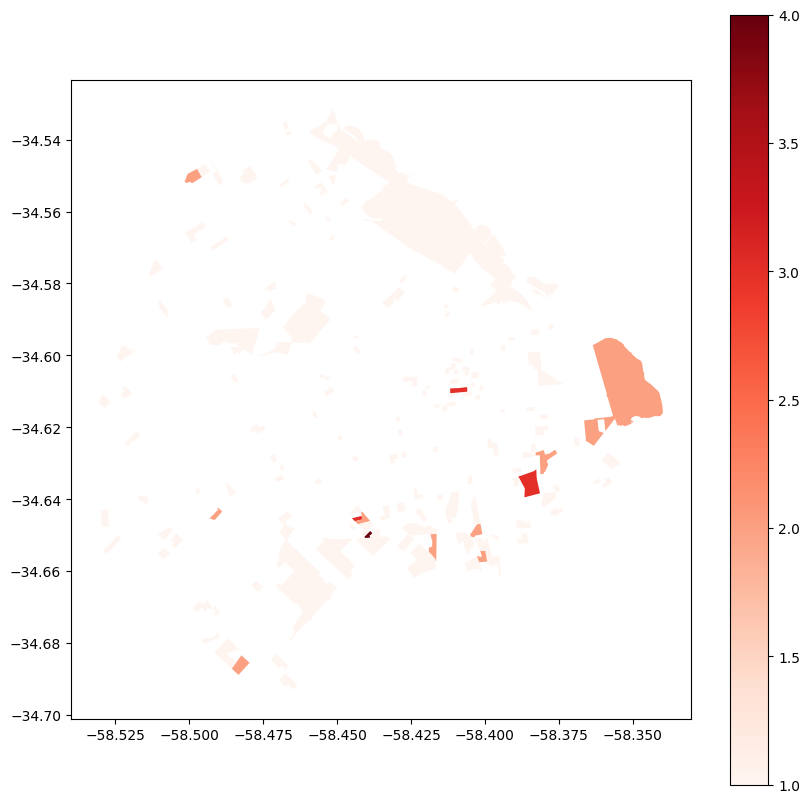

In [53]:
agged_rc_delitos_por_tipo[agged_rc_delitos_por_tipo.tipo.str.lower().str.contains("homicidio")].plot(column="cantidad_delitos", cmap="Reds", legend=True, figsize=(10,10))

Homicidios va a ser una variable binaria porque hay muy pocos casos, y concentrados en sólo un conjunto reducido de radios censales

### Get metrics

In [222]:
# Data frame para guardar indicadores
data_criminalidad = radios_censales[["CO_FRAC_RA", "geometry"]].copy()
data_criminalidad

,CO_FRAC_RA,geometry
0,1_1_1,"MULTIPOLYGON (((-58.37249 -34.59155, -58.37261..."
1,1_12_1,"MULTIPOLYGON (((-58.38652 -34.60399, -58.38634..."
2,1_12_10,"MULTIPOLYGON (((-58.37938 -34.60484, -58.37801..."
3,1_12_11,"MULTIPOLYGON (((-58.36792 -34.60517, -58.36772..."
4,1_12_2,"MULTIPOLYGON (((-58.38513 -34.60391, -58.38371..."
...,...,...
3549,1_3_12,"MULTIPOLYGON (((-58.38212 -34.58430, -58.38125..."
3550,1_3_11,"MULTIPOLYGON (((-58.38119 -34.58483, -58.38002..."
3551,1_3_10,"MULTIPOLYGON (((-58.38086 -34.58431, -58.38047..."
3552,7_18_11,"MULTIPOLYGON (((-58.43532 -34.64905, -58.43496..."


#### Quintiles de Hurto y Robo

<Axes: >

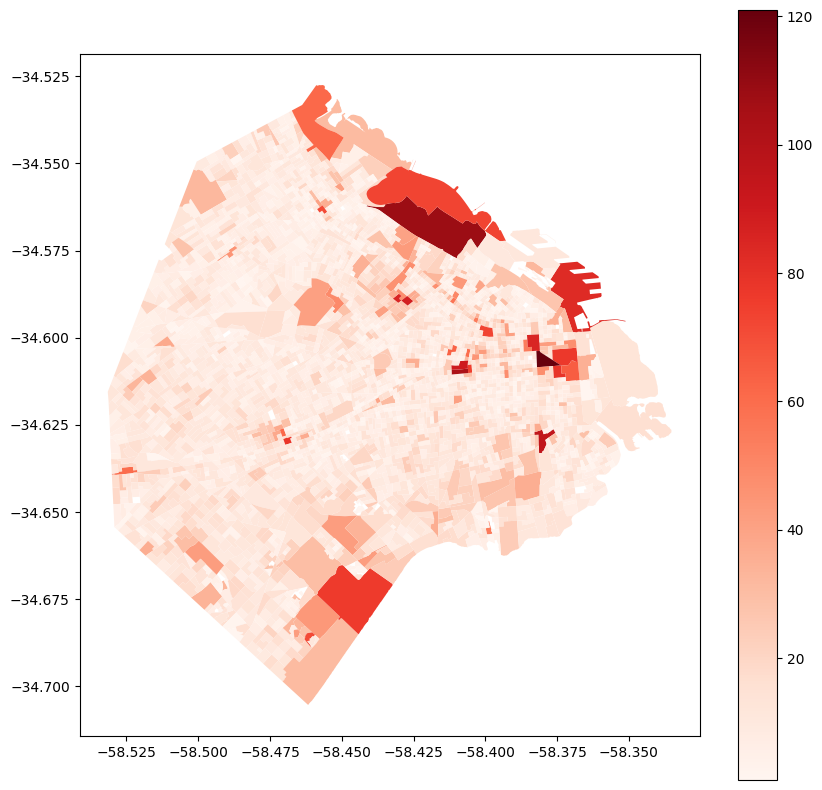

In [223]:
agged_rc_delitos_hurto = agged_rc_delitos_por_tipo[agged_rc_delitos_por_tipo.tipo.str.lower().str.contains("hurto")]
agged_rc_delitos_hurto.plot(column="cantidad_delitos", cmap="Reds", legend=True, figsize=(10,10))

In [224]:
pd.qcut(agged_rc_delitos_hurto.cantidad_delitos, q=5, labels=False).value_counts(normalize=True, dropna=False) ## El score se nota bien distribuido, sin desbalances


0    0.271633
2    0.216619
4    0.180229
3    0.167335
1    0.164183
Name: cantidad_delitos, dtype: float64

In [225]:
agged_rc_delitos_hurto["score_hurtos"] = pd.qcut(agged_rc_delitos_hurto.cantidad_delitos, q=5, labels=False) + 1
data_criminalidad = data_criminalidad.merge(agged_rc_delitos_hurto[["score_hurtos", "CO_FRAC_RA"]], on="CO_FRAC_RA", how="left")

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

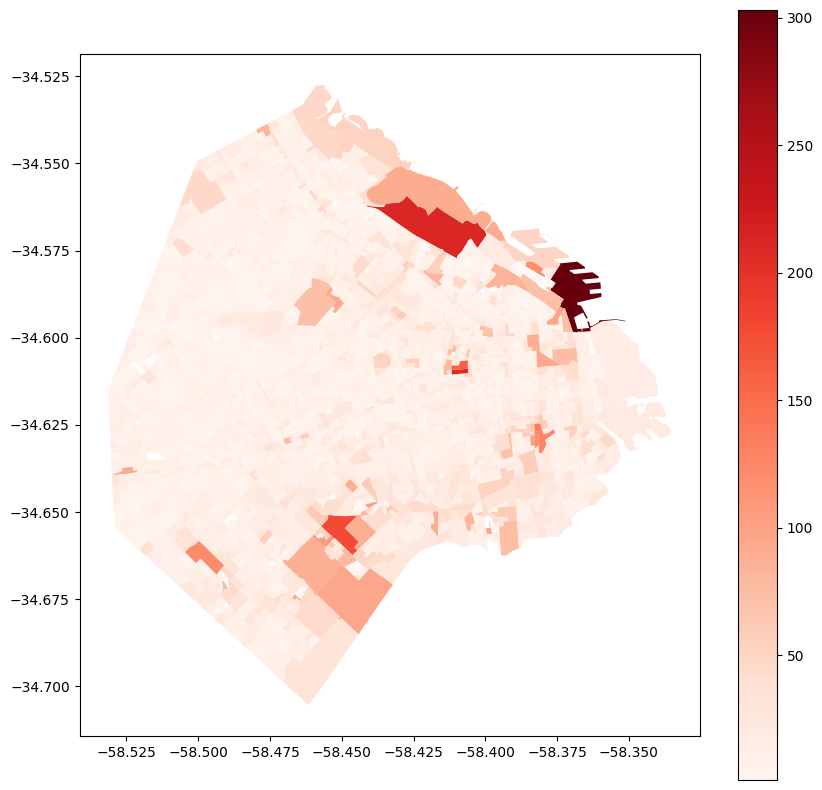

In [226]:
agged_rc_delitos_robo = agged_rc_delitos_por_tipo[agged_rc_delitos_por_tipo.tipo.str.lower().str.contains("robo")]
agged_rc_delitos_robo.plot(column="cantidad_delitos", cmap="Reds", legend=True, figsize=(10,10))

In [227]:
# Split en quintiles
agged_rc_delitos_robo["score_robo"] = pd.qcut(agged_rc_delitos_robo.cantidad_delitos, q=5, labels=False) + 1
agged_rc_delitos_robo.score_robo.value_counts(normalize=True, dropna=False)

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



1    0.234085
2    0.207536
4    0.201827
5    0.179560
3    0.176991
Name: score_robo, dtype: float64

In [228]:
# merge with data_criminalidad
data_criminalidad = data_criminalidad.merge(agged_rc_delitos_robo[["score_robo", "CO_FRAC_RA"]], on="CO_FRAC_RA", how="left")

Text(0.5, 1.0, 'Score Hurto')

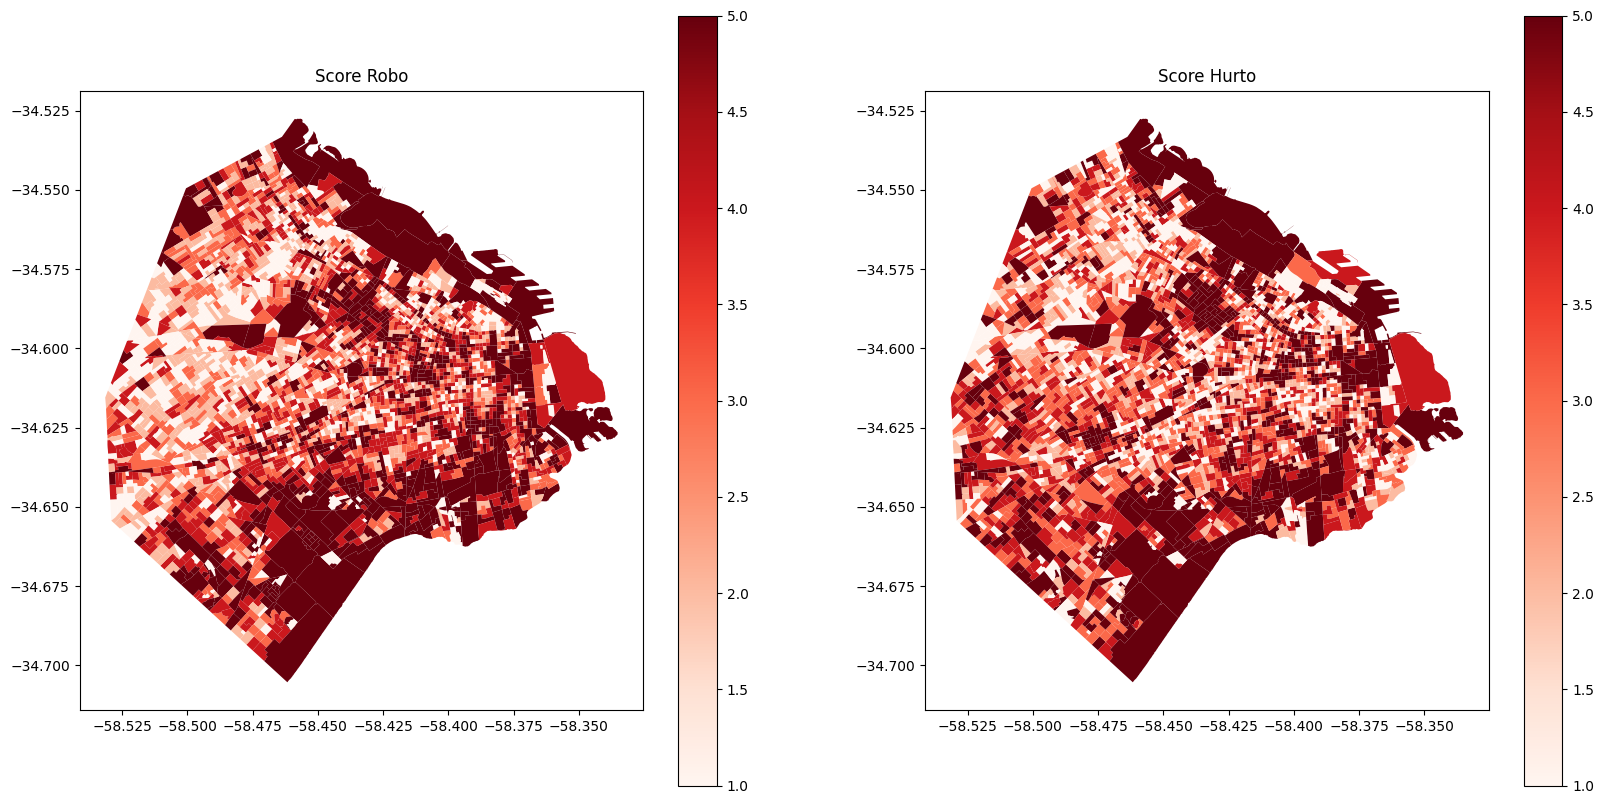

In [229]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
data_criminalidad.fillna(1).plot(column="score_robo", cmap="Reds", legend=True, ax=ax[0])
ax[0].set_title("Score Robo")
data_criminalidad.fillna(1).plot(column="score_hurtos", cmap="Reds", legend=True, ax=ax[1])
ax[1].set_title("Score Hurto")

In [230]:
data_criminalidad.fillna({
    "score_robo": 1,
    "score_hurtos": 1
}, inplace=True)

#### Score de Delitos por Lesiones

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

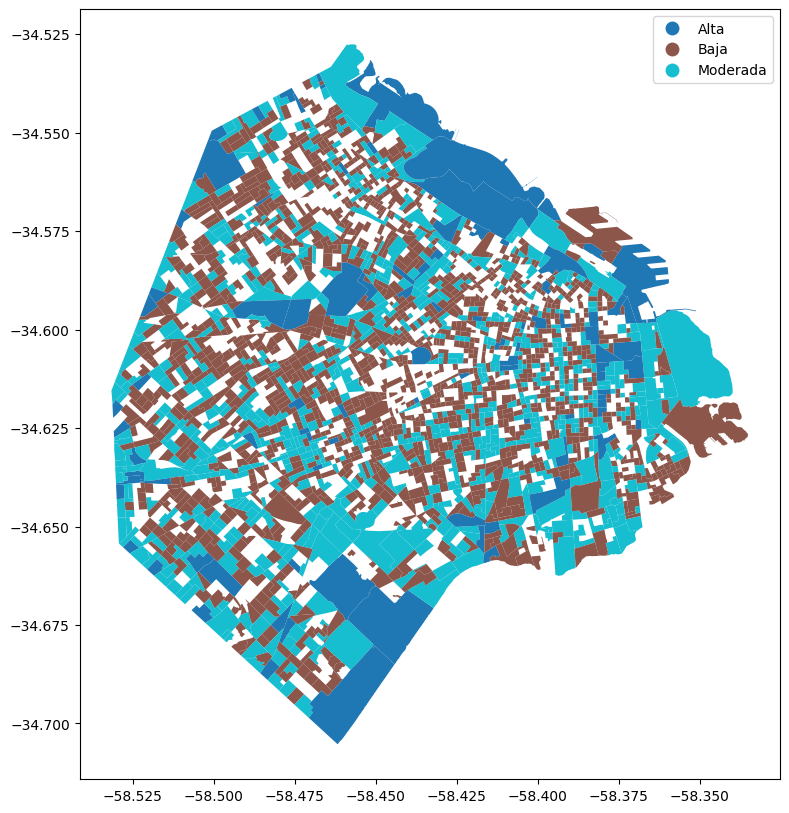

In [231]:
agged_rc_delitos_lesiones = agged_rc_delitos_por_tipo[agged_rc_delitos_por_tipo.tipo.str.lower().str.contains("lesiones")]
agged_rc_delitos_lesiones["score_lesiones"] = agged_rc_delitos_lesiones.cantidad_delitos.apply(lambda d: assign_concentration(d, agged_rc_delitos_lesiones.cantidad_delitos).title())
agged_rc_delitos_lesiones.score_lesiones.value_counts(normalize=True, dropna=False)

agged_rc_delitos_lesiones.plot(column="score_lesiones", legend=True, figsize=(10,10), categorical=True)

In [232]:
# mmerge with data_criminalidad
data_criminalidad = data_criminalidad.merge(agged_rc_delitos_lesiones[["score_lesiones", "CO_FRAC_RA"]], on="CO_FRAC_RA", how="left")
data_criminalidad.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 3554 entries, 0 to 3553
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CO_FRAC_RA      3554 non-null   object  
 1   geometry        3554 non-null   geometry
 2   score_hurtos    3554 non-null   float64 
 3   score_robo      3554 non-null   float64 
 4   score_lesiones  2349 non-null   object  
dtypes: float64(2), geometry(1), object(2)
memory usage: 166.6+ KB


In [233]:
data_criminalidad.fillna({"score_lesiones": "Baja"}, inplace=True)

In [234]:
pd.get_dummies(data_criminalidad.score_lesiones.fillna("baja"), prefix="lesiones").value_counts().to_frame()

0
lesiones_Alta lesiones_Baja lesiones_Moderada      
0             1             0                  2674
              0             1                   788
1             0             0                    92

#### Homicidios

In [235]:
agged_rc_delitos_homicidio = agged_rc_delitos_por_tipo[agged_rc_delitos_por_tipo.tipo.str.lower().str.contains("homicidio")]
agged_rc_delitos_homicidio["homicidio_reportado"] = agged_rc_delitos_homicidio.cantidad_delitos.apply(lambda d: "Reportados" if d > 0 else "No reportados")
agged_rc_delitos_homicidio.homicidio_reportado.value_counts(normalize=True, dropna=False)

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Reportados    1.0
Name: homicidio_reportado, dtype: float64

<Axes: >

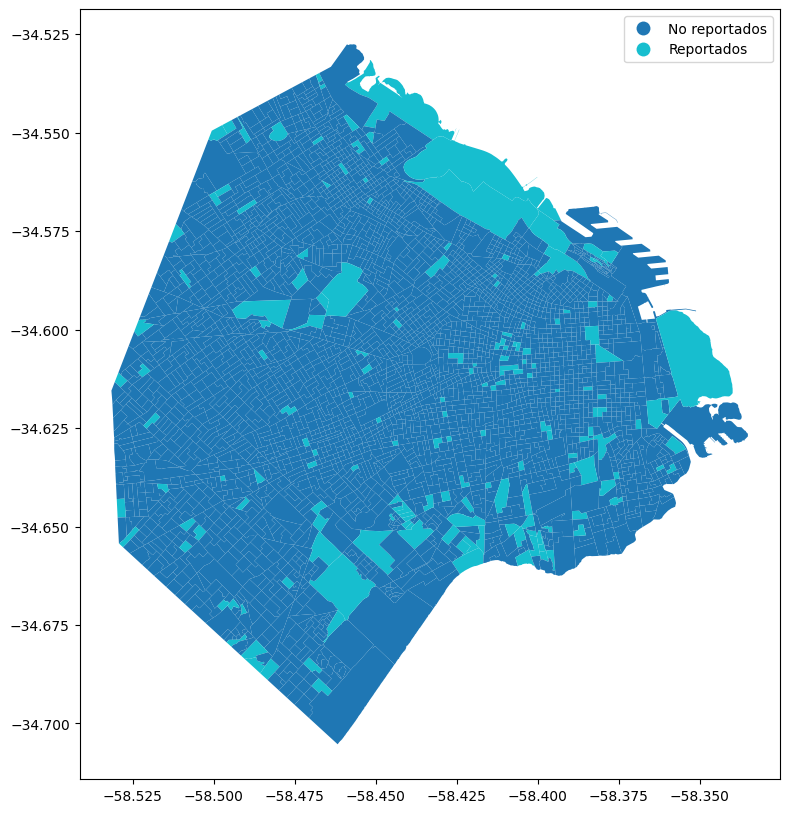

In [236]:
data_criminalidad = data_criminalidad.merge(agged_rc_delitos_homicidio[["homicidio_reportado", "CO_FRAC_RA"]], on="CO_FRAC_RA", how="left")
data_criminalidad.fillna({"homicidio_reportado": "No reportados"}, inplace=True)
data_criminalidad.plot(column="homicidio_reportado", legend=True, figsize=(10,10), categorical=True)

In [237]:
data_criminalidad.sample()

,CO_FRAC_RA,geometry,score_hurtos,score_robo,score_lesiones,homicidio_reportado
2031,3_16_9,"MULTIPOLYGON (((-58.41287 -34.61412, -58.41131...",3.0,5.0,Baja,No reportados


In [238]:
# Agregar cantidad de lesiones reportadas
data_criminalidad = data_criminalidad.merge(agged_rc_delitos_lesiones[["cantidad_delitos", "CO_FRAC_RA"]], on="CO_FRAC_RA", how="left")
data_criminalidad.fillna({"cantidad_delitos": 0}, inplace=True)
data_criminalidad.rename(columns={"cantidad_delitos": "lesiones_reportadas"}, inplace=True)

In [239]:
data_criminalidad.score_hurtos = data_criminalidad.score_hurtos.astype(int).astype(str)
data_criminalidad.score_robo = data_criminalidad.score_robo.astype(int).astype(str)


In [240]:
# Save to final destination
data_criminalidad.to_file("data/final/data_criminalidad.geojson", driver="GeoJSON")
data_criminalidad.to_file("src/data/final/data_criminalidad.geojson", driver="GeoJSON")

## Violencia de Género

### Distancia a comisarías

In [241]:
data_vdg = radios_censales[["CO_FRAC_RA", "geometry"]].copy()

In [244]:
from shapely import wkt

/tmp/ipykernel_143880/3914016341.py:14: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<Axes: >

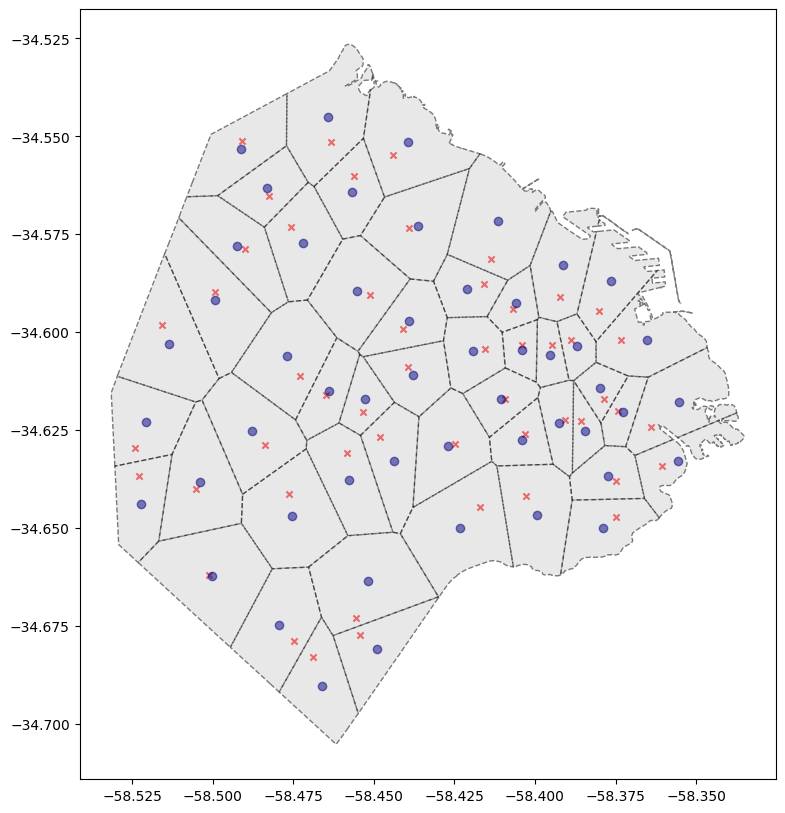

In [278]:
comisarias = pd.read_csv(os.path.join(DATA_PROCESSED_PATH, "comisarias.csv"))
comisarias_gdf = gpd.GeoDataFrame(comisarias, geometry=comisarias.apply(lambda r: wkt.loads(r["geometry_comisaria"]), axis=1))
comisarias_gdf.drop(columns=["geometry_voronoi", "geometry_voronoi_centroid"], inplace=True)
comisarias_gdf.set_crs(epsg=4326, inplace=True)


comisarias_voronoi_polygons = gpd.GeoDataFrame(comisarias, geometry=comisarias.apply(lambda r: wkt.loads(r["geometry_voronoi"]), axis=1))
comisarias_voronoi_polygons.drop(columns=["geometry_comisaria", "geometry_voronoi_centroid"], inplace=True)
comisarias_voronoi_polygons.set_crs(epsg=4326, inplace=True)

fig, ax = plt.subplots(1,1, figsize=(10,10))
comisarias_gdf.plot(ax=ax, color="red", markersize=20, marker="x", label="Comisarias")
comisarias_voronoi_polygons.plot(ax=ax, color="lightgray", alpha=0.5, label="Voronoi", edgecolor="black", linestyle="--")
comisarias_voronoi_polygons.centroid.plot(color="navy", alpha=0.5, label="Voronoi Centroid", marker="o", ax=ax)


In [284]:
data_vdg.shape

(3554, 2)

In [290]:
comisarias_voronoi_polygons.sample()

,id,nombre,designa,dependenci,tipo,calle,altura,direccion,telefonos,observacio,observac_1,barrio,comunas,nom_mapa,nom_ante,geometry_voronoi,geometry
30,22,Comisaría Comunal 9,CC9 / C9A,Departamento/ División,Comunal-Vecinal,Lisandro de la Torre,2343,"DE LA TORRE, LISANDRO AV. 2343",4687-3333/6478,NaN,NaN,MATADEROS,9,Comisaría Comunal 9,Comisaría 42,POLYGON ((-58.4950242875024 -34.68016239857023...,"POLYGON ((-58.49502 -34.68016, -58.49875 -34.6..."


In [291]:
# data_vdg.sjoin(comisarias_voronoi_polygons, how="left", op="intersects").drop(columns=["index_right"]).info() ## duplicados porque un RC puede intersecar a más de un voronoi
def get_most_overlapping_polygon(input_polygon, polygons, cod_comisaria):
    """
    Compute the percentage overlap of the input polygon with all the polygons in the list
    and get the polygon with the highest overlap
    """
    assert len(polygons) == len(cod_comisaria), "Length of polygons and cod_comisaria must be the same"
    input_polygon_area = input_polygon.area
    overlapping_polygons = []
    for polygon in polygons:
        overlapping_polygons.append(input_polygon.intersection(polygon).area / input_polygon_area)

    return cod_comisaria[np.argmax(overlapping_polygons)]

data_vdg["comisaria_correspondiente"] = data_vdg.geometry.apply(lambda p: get_most_overlapping_polygon(p, comisarias_voronoi_polygons.geometry, comisarias_voronoi_polygons.id))
data_vdg.comisaria_correspondiente.value_counts(normalize=True, dropna=False)

17    0.037985
32    0.034890
7     0.033202
37    0.031795
39    0.031795
34    0.031514
8     0.030107
11    0.029263
45    0.028981
23    0.028981
48    0.028981
18    0.027856
24    0.027293
29    0.027012
21    0.026168
35    0.024198
54    0.022791
53    0.021947
49    0.021666
47    0.021666
22    0.021103
20    0.021103
42    0.020822
33    0.020540
27    0.019977
57    0.019696
10    0.019133
25    0.018571
5     0.017727
6     0.017164
51    0.016882
50    0.016038
55    0.015757
3     0.014913
41    0.014069
26    0.013225
13    0.013225
2     0.012943
59    0.012662
58    0.011255
43    0.010974
4     0.010974
52    0.010692
56    0.010129
38    0.009848
12    0.009567
1     0.008441
44    0.008441
15    0.008160
40    0.007034
19    0.000844
Name: comisaria_correspondiente, dtype: float64

In [292]:
def get_distance_to_comisaria(radio_censal_polygon, id_comisaria, comisarias_gdf=comisarias_gdf):
    comisaria_polygon = comisarias_gdf[comisarias_gdf.id == id_comisaria].geometry.iloc[0]
    return radio_censal_polygon.distance(comisaria_polygon)

data_vdg["distancia_comisaria"] = data_vdg.apply(lambda r: get_distance_to_comisaria(r.geometry, r.comisaria_correspondiente), axis=1)
data_vdg.distancia_comisaria.describe()

count    3554.000000
mean        0.006564
std         0.004121
min         0.000000
25%         0.003477
50%         0.005912
75%         0.009114
max         0.023720
Name: distancia_comisaria, dtype: float64

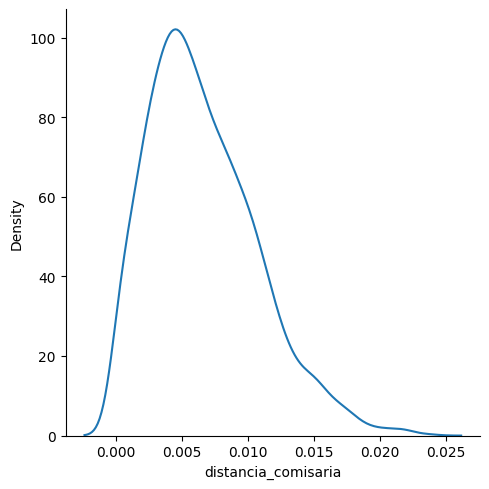

In [297]:
## plot KDE to see the distribution of distances
sns.displot(data_vdg.distancia_comisaria, kind="kde")
plt.show()

## get quintiles de distancias para asociar a score categórico
(pd.qcut(data_vdg.distancia_comisaria, q=5, labels=False)+1).value_counts().to_frame()

data_vdg["quintil_distancia_comisaria"] = pd.qcut(data_vdg.distancia_comisaria, q=5, labels=False)+1

/home/juanse/anaconda3/envs/dataanalysis/lib/python3.9/site-packages/geopandas/plotting.py:642: FutureWarning:

'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)



<Axes: >

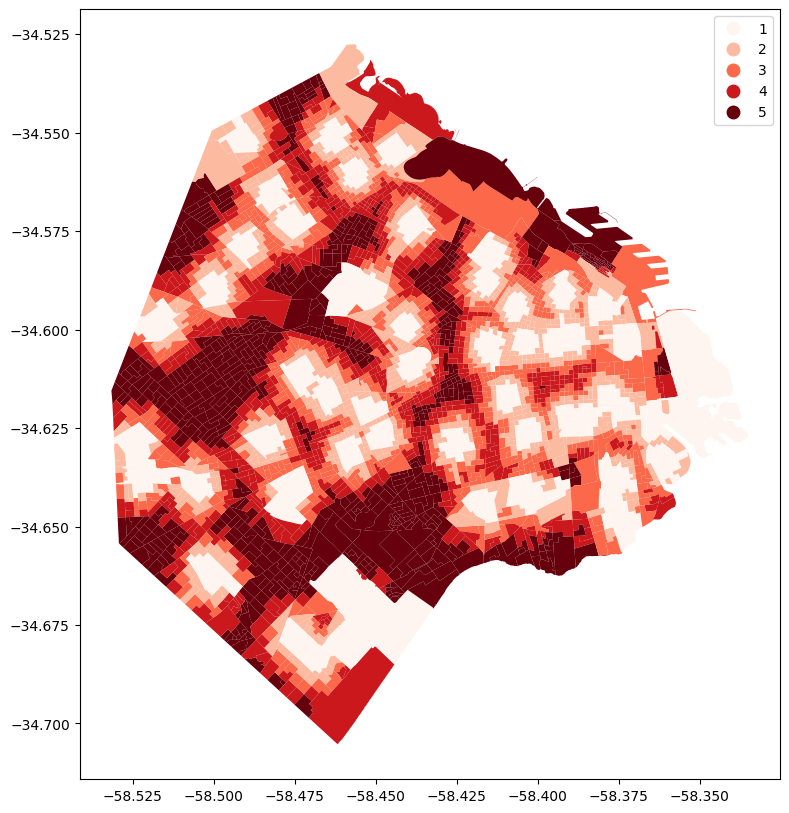

In [301]:
data_vdg.plot(column="quintil_distancia_comisaria", legend=True, figsize=(10,10), categorical=True, colormap="Reds")

<Axes: >

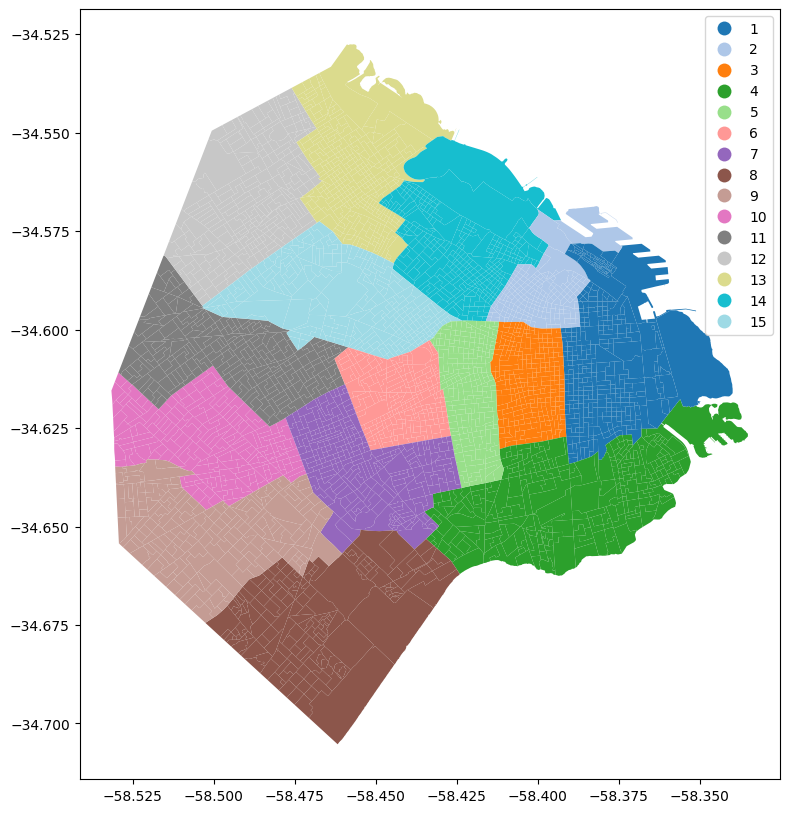

In [312]:
data_vdg["comuna"] = data_vdg.CO_FRAC_RA.str.split("_").str[0].astype(int)
data_vdg.plot(column="comuna", legend=True, figsize=(10,10), categorical=True, colormap="tab20")

In [315]:
mapa_vdg = pd.read_csv(os.path.join(DATA_PROCESSED_PATH, "mapa-violencia-de-genero-2021.csv"))
mapa_vdg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   justicia_solicitante  1450 non-null   object
 1   comuna                1450 non-null   int64 
 2   tipificacion          1450 non-null   object
 3   modalidad             1450 non-null   object
 4   geometry              1450 non-null   object
dtypes: int64(1), object(4)
memory usage: 56.8+ KB


<Axes: >

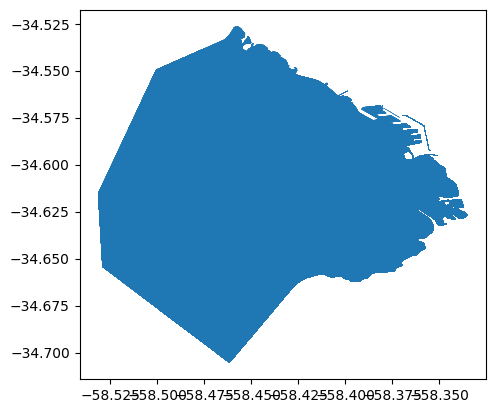

In [316]:
mapa_vdg = gpd.GeoDataFrame(mapa_vdg, geometry=mapa_vdg.apply(lambda r: wkt.loads(r["geometry"]), axis=1))
mapa_vdg.plot()

In [317]:
mapa_vdg.sample()

,justicia_solicitante,comuna,tipificacion,modalidad,geometry
290,CIUDAD,14,"VIOLENCIA DE GENERO, VIOLENCIA FAMILIAR",Consigna Fija,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676..."


<Axes: ylabel='comuna'>

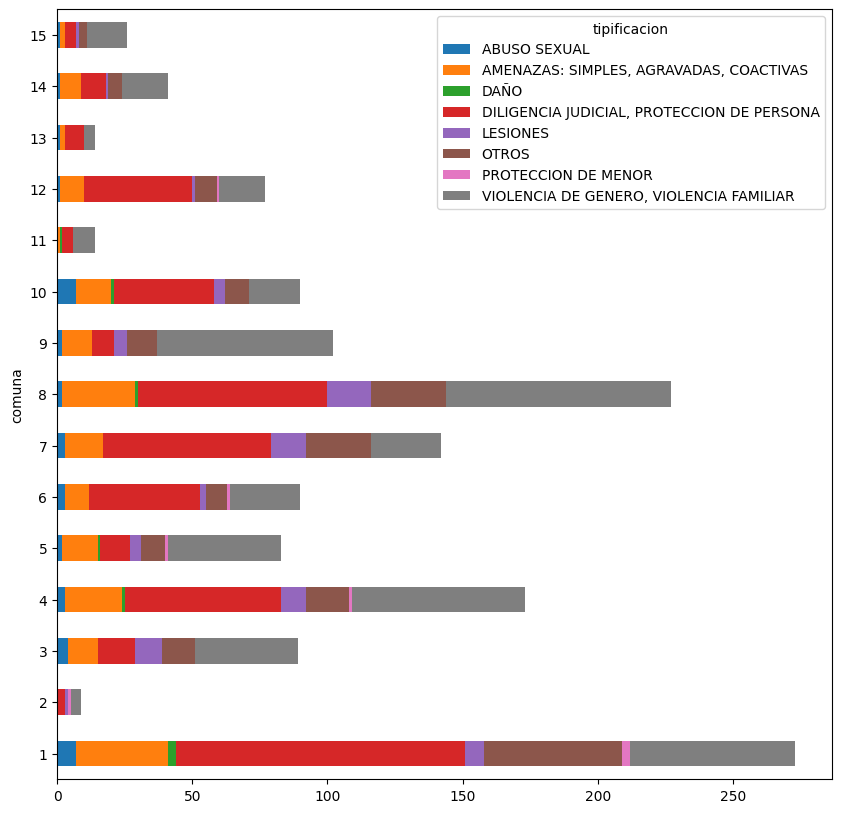

In [327]:
comunas_vdg = mapa_vdg.groupby(["comuna", "tipificacion"])\
    .geometry.count()\


comunas_vdg.unstack().plot(stacked=True, kind="barh", figsize=(10,10))

In [330]:
comunas_vdg = comunas_vdg.to_frame().rename(columns={"geometry": "cantidad_casos"})

<Axes: >

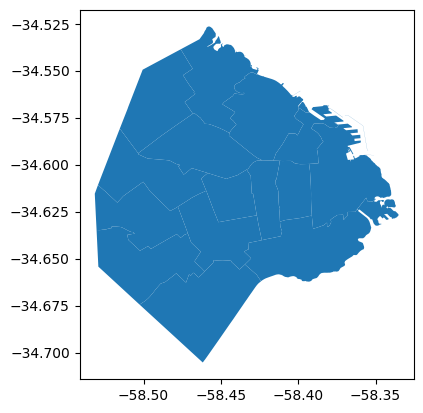

In [340]:
comunas = gpd.read_file(os.path.join(RES_PATH, "comunas-geojson.json"))
comunas.COMUNAS = comunas.COMUNAS.astype(int)
comunas.rename(columns={"COMUNAS": "comuna"}, inplace=True)
comunas.plot()

In [349]:
mapa_vdg = gpd.GeoDataFrame(comunas_vdg.reset_index().merge(comunas, on="comuna"), geometry="geometry")
type(mapa_vdg)

geopandas.geodataframe.GeoDataFrame

<Axes: >

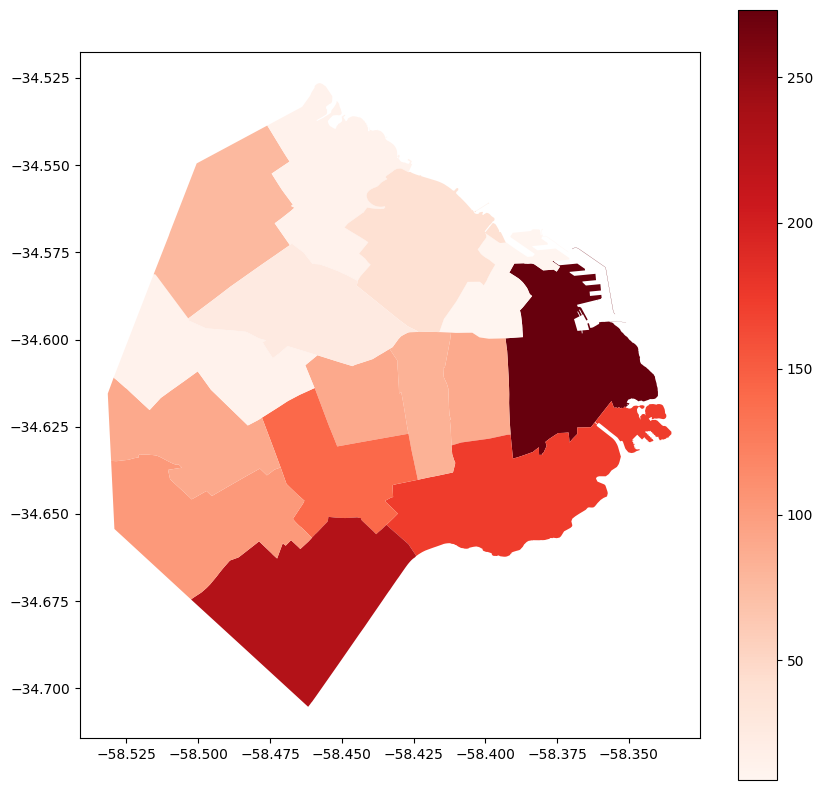

In [361]:
mapa_vdg.groupby("comuna").agg({
    "geometry": "first",
    "cantidad_casos": "sum"
})\
    .set_geometry("geometry")\
    .set_crs(epsg=4326, inplace=True)\
    .plot(column="cantidad_casos", legend=True, figsize=(10,10), cmap="Reds")

In [363]:
mapa_vdg[["comuna", "tipificacion", "cantidad_casos", "geometry"]].to_file(os.path.join(DATA_PROCESSED_PATH, "mapa-violencia-de-genero-2021.geojson"), driver="GeoJSON")
mapa_vdg[["comuna", "tipificacion", "cantidad_casos", "geometry"]].to_file(os.path.join("src/data/final", "mapa-violencia-de-genero-2021.geojson"), driver="GeoJSON")

# Visual Tests

In [114]:
import plotly.express as px

In [119]:
# convert geodataframe to data frame
df = pd.DataFrame(data_criminalidad)

In [128]:
data_criminalidad.sample()

,CO_FRAC_RA,geometry,score_hurtos,score_robo,score_lesiones,homicidio_reportado
234,1_9_13,"MULTIPOLYGON (((-58.37051 -34.60065, -58.37066...",3.0,4.0,normal,False


In [ ]:
# test figure
px.choropleth_mapbox(data_criminalidad, geojson=data_criminalidad.set_index("CO_FRAC_RA").geometry,
                             color="score_robo",
                            locations="CO_FRAC_RA",)